# Using t-SNE to reduce the MNIST data set

From the Scikit-Learn web site: ['t-distributed Stochastic Neighbor Embedding - scikit-learn'](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

Let's use it to reduce the dimensionality of the MNIST data set.

 - [Loading MNIST data set](#Loading-MNIST-data-set)
 - [t-SNE analysis](#t-SNE-analysis)

## Loading MNIST data set

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn import manifold
from time import time
%matplotlib inline

In [3]:
# load the MNIST data set
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [11]:
print(f'mnist.data.shape: {mnist.data.shape}')
print(f'mnist.target.shape: {mnist.target.shape}')

mnist.data.shape: (70000, 784)
mnist.target.shape: (70000,)


In [99]:
X = mnist.data
Y = mnist.target
Y = Y.astype('int32')

In [98]:
from pprint import pprint
pprint(mnist.details)

{'default_target_attribute': 'class',
 'file_id': '52667',
 'format': 'ARFF',
 'id': '554',
 'licence': 'Public',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495',
 'name': 'mnist_784',
 'processing_date': '2018-10-03 21:23:30',
 'status': 'active',
 'tag': ['AzurePilot',
         'OpenML-CC18',
         'OpenML100',
         'study_1',
         'study_123',
         'study_41',
         'study_99',
         'vision'],
 'upload_date': '2014-09-29T03:28:38',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'version': '1',
 'visibility': 'public'}


## t-SNE analysis

In [8]:
n_components = 2
perplexity = 30
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=42, perplexity=perplexity, n_jobs=-1)

In [13]:
t0 = time()
X_reduced = tsne.fit_transform(X)
print(f'Time elapsed: {time() - t0:.4f} sec')

Time elapsed: 2006.6585 sec


In [14]:
X_reduced.shape

(70000, 2)

In [103]:
type(X_reduced)

numpy.ndarray

In [144]:
def calculate_label_centroid(x_arr, y_arr, label):
    centroid_arr = []
    for col in range(0, 2):
        centroid_arr.append(sum(x_arr[y_arr == label, col])/len(x_arr[y_arr == label, col]))
    return centroid_arr

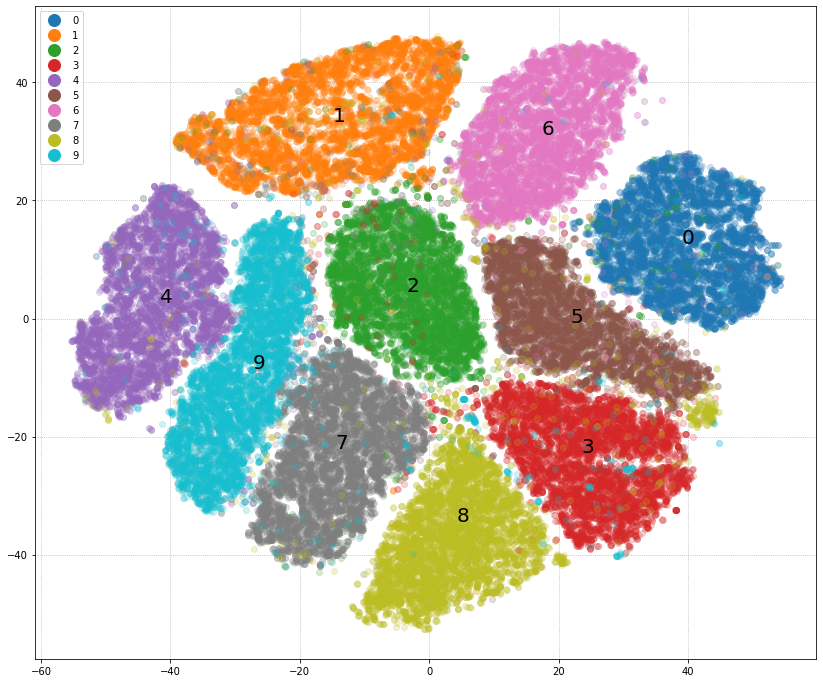

In [156]:
fig, ax = plt.subplots(figsize=(14, 12))
color_map = get_cmap('tab10', 10)
colors = color_map.colors
for i, color in enumerate(colors):
    ax.plot(X_reduced[Y == i, 0], X_reduced[Y == i, 1], marker='o', linestyle='', c=color, alpha=0.2, label=i)
    ax.annotate(s=str(i), xy=(calculate_label_centroid(X_reduced, Y, i)[0], calculate_label_centroid(X_reduced, Y, i)[1]), fontsize=20)
leg = plt.legend(loc=2)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)
    lh._legmarker.set_markersize(12)
plt.grid(True, linestyle=':');